In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import glob
import os

In [2]:
anat_data = "/home/sabs-r3/Documents/02_Teaching/Brains-are-hard/data/sub-01/ses-retest/anat/sub-01_ses-retest_T1w.nii.gz"

motion = "/home/sabs-r3/Documents/02_Teaching/Brains-are-hard/data/sub-01/ses-retest/func/sub-01_ses-retest_task-fingerfootlips_bold.nii.gz"

In [3]:
def load_imgs(file):
    img = nib.load(file)
    data = img.get_fdata()
    return data

def show_img_time(data):
    
    #plt.figure(14, figsize=(15,20))
    
    plt_data = data[:,20:41,:,:].mean(1)
    
    
    split_data = np.array(np.split(plt_data, 14, axis=2))
    
    result = []
    
    for num, a_data in enumerate(split_data):
        
        # This is with a 10 second delay from movement to measurement
        movement = a_data[:,:,3:7].mean(2)
        non_move = a_data[:,:,9:13].mean(2)
        
        a_data = movement-non_move
        
        result.append(a_data)
        
        #plt.subplot(5,5,num+1)
        #plt.imshow(a_data, vmax = 100)
    
    return np.array(result)

def get_labels():
    label = ['finger', 'foot', 'lip']
    labels = label*4 + ['finger', 'foot']


    s = pd.Series(labels)
    return pd.get_dummies(s).to_numpy()

def get_data(file='/home/sabs-r3/Documents/02_Teaching/Brains-are-hard/dataformated/training/'):

    all_data = []
    all_labels = []

    for i in glob.glob(os.path.join(file, "*gz")):
        data = load_imgs(motion)
        new_data = show_img_time(data[:,:,:,10:-6]) # 4 + 2
        labels = get_labels()

        all_data += list(new_data)
        all_labels += list(labels)


    return np.array(all_data), np.array(all_labels)

In [4]:
data = load_imgs(motion)

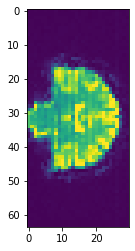

In [5]:
### data.shape

plt.imshow(data[:,30,:,0], vmax = 2000)

In [6]:
new_data = show_img_time(data[:,:,:,10:-6]) # 4 + 2
labels = get_labels()

print(labels.shape)
new_data.shape

(14, 3)


(14, 64, 30)

In [24]:
training = '/home/sabs-r3/Documents/02_Teaching/Brains-are-hard/dataformated/training/'
testing = '/home/sabs-r3/Documents/02_Teaching/Brains-are-hard/dataformated/testing/'

In [26]:
_data, _labels = get_data(testing)

np.savez('testing_data.npz', data=_data, labels=_labels)

npzfile = np.load('testing_data.npz')

npzfile['labels'].shape

(56, 3)

In [9]:
(4) - 6 - 2 - 4  - 6 - 2 - 4

8 - 12
9 - 13

20 - 24
21 - 25




movement = plt_data[:,:,i*12+2:i*12+5].mean(2)
non_move = plt_data[:,:,i*12+8:i*12+10].mean(2)

NameError: name 'plt_data' is not defined

In [ ]:
#for i in range(185): 
#    print(data[:,:,:,i].shape)
#    new = data[:,:,:,i].mean(axis=2)
#    print(new.shape)


new_data = np.array([data[:,:,:,i+1].mean(axis=2) for i in range(183)])

print(new_data.shape)

def show_img_time(data, time):
    
    plt.figure(3, figsize=(15,20))
    
    slize = 24
    
    plt.subplot(5,5,1)
    plt.imshow(data[time-75])
    plt.subplot(5,5,2)
    plt.imshow(data[time-37])
    plt.subplot(5,5,3)
    plt.imshow(data[time])
    plt.subplot(5,5,4)
    plt.imshow(data[time+37])
    plt.subplot(5,5,5)
    plt.imshow(data[time+75])


show_img_time(new_data, int(197.5/2.5))

In [ ]:
ani = animation.FuncAnimation(fig, update, len(a))
writer = animation.ImageMagickFileWriter(fps=5)
ani.save('anterior_posterior.gif', writer=writer) 